# TIME SERIES FINAL PROJECT: Timeseries forecasting for weather prediction

## Flàvia Ferrús Marimón

## Problem Statement

We will be using Jena Climate dataset recorded by the Max Planck Institute for Biogeochemistry (https://www.bgc-jena.mpg.de/wetter/). 

The dataset consists of 14 features such as temperature, pressure, humidity etc, recorded once per 10 minutes.

Given the writer interest on learning to apply all the learned time series methods in python in order to improve this language programming skills for better performance on the final thesis, this project may be conducted using python. 

### Dataset analysis

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
#import tensorflow as tf
from tensorflow import keras

In /Users/flaviaferrusmarimon/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/flaviaferrusmarimon/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/flaviaferrusmarimon/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/flaviaferrusmarimon/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /

In [6]:
from zipfile import ZipFile
import os

uri = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
zip_path = keras.utils.get_file(origin=uri, fname="jena_climate_2009_2016.csv.zip")
zip_file = ZipFile(zip_path)
zip_file.extractall()
csv_path = "jena_climate_2009_2016.csv"

df = pd.read_csv(csv_path)

In [7]:
df.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [8]:
df.head

<bound method NDFrame.head of                   Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  \
0       01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90   
1       01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28   
2       01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31   
3       01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07   
4       01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04   
...                     ...       ...       ...       ...          ...   
420546  31.12.2016 23:20:00   1000.07     -4.05    269.10        -8.13   
420547  31.12.2016 23:30:00    999.93     -3.35    269.81        -8.06   
420548  31.12.2016 23:40:00    999.82     -3.16    270.01        -8.21   
420549  31.12.2016 23:50:00    999.81     -4.23    268.94        -8.53   
420550  01.01.2017 00:00:00    999.82     -4.82    268.36        -8.42   

        rh (%)  VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
0        9

As we can see, this data corresponds to the different weather features, as above stated in terms of the columns of the data set at 
- Location: Weather Station, Max Planck Institute for Biogeochemistry in Jena, Germany
- Time-frame Considered: Jan 10, 2009 - December 31, 2016

However, same information from an alternative weather station is loaded and may be studied afterwards: 
- Location: Weather Station Saaleaue, Germany
- Time-frame Considered: Jan 1, 2023 - Corrent time

If the desired results are reached, this dataset may be used as validation set in order to constrast the weather and the models used on the first dataset. 

#### Raw data visualization

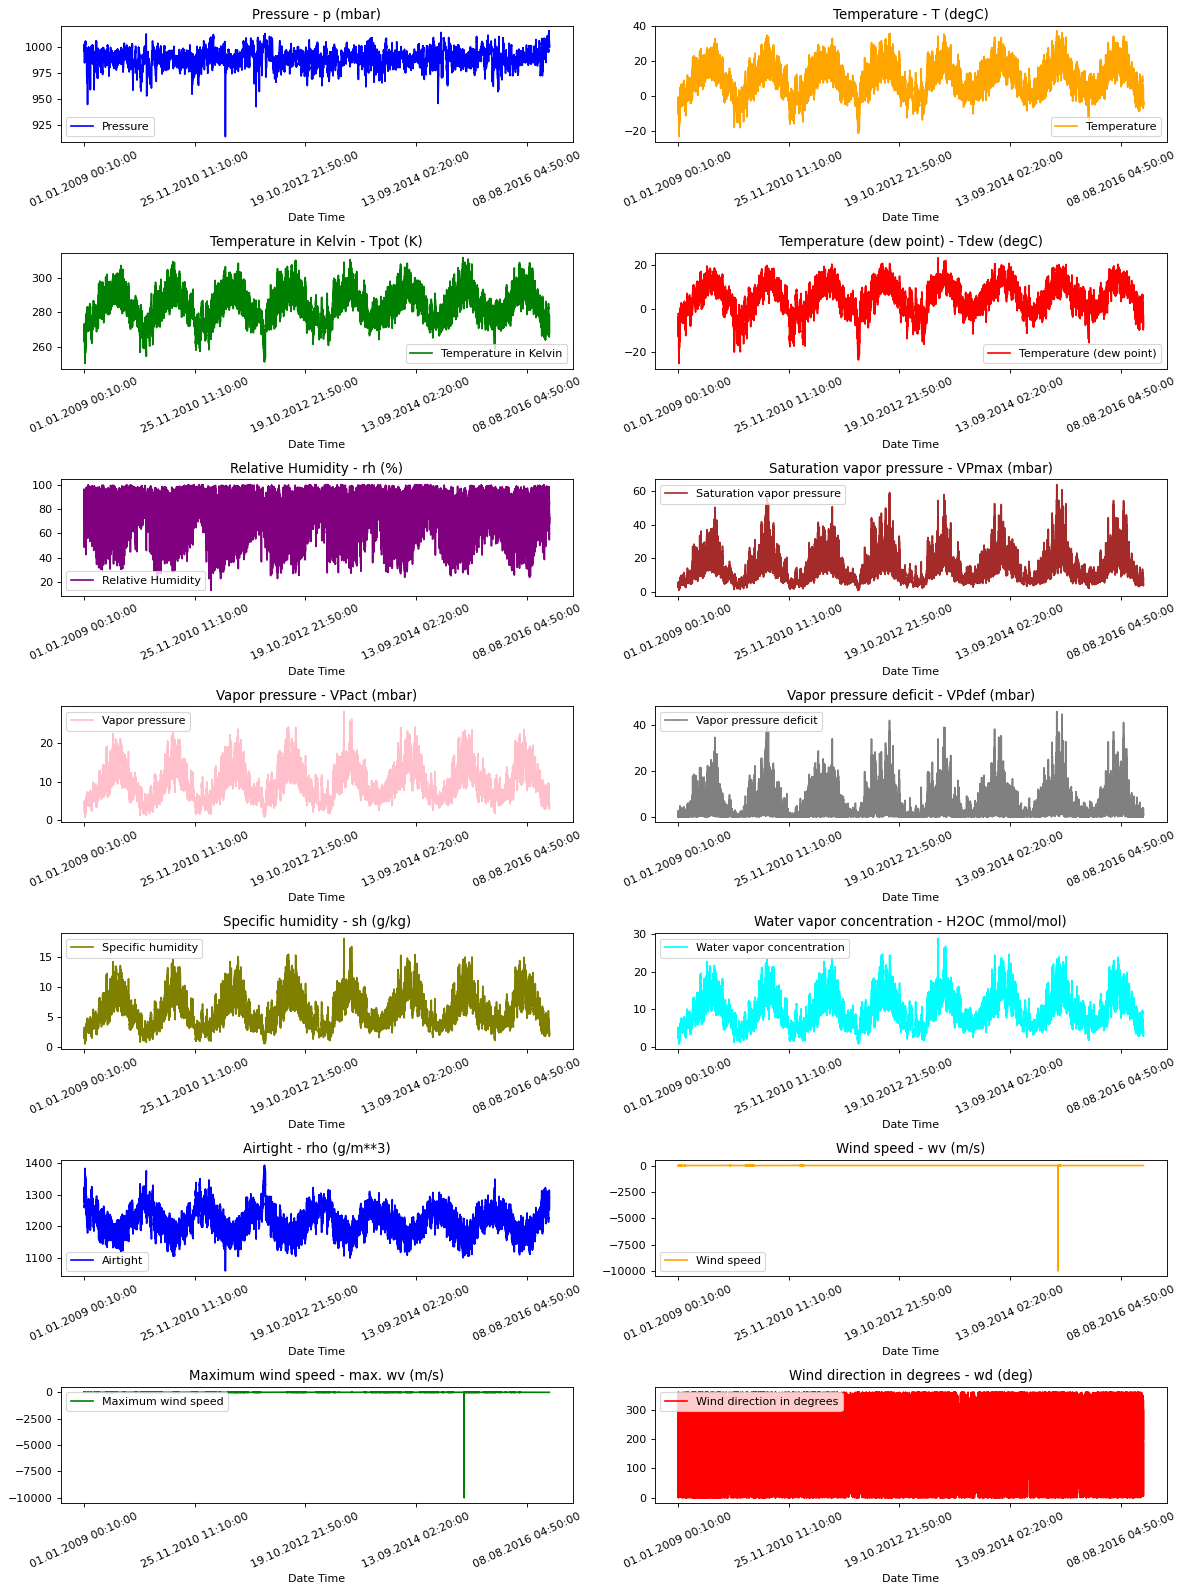

In [9]:
titles = [
    "Pressure",
    "Temperature",
    "Temperature in Kelvin",
    "Temperature (dew point)",
    "Relative Humidity",
    "Saturation vapor pressure",
    "Vapor pressure",
    "Vapor pressure deficit",
    "Specific humidity",
    "Water vapor concentration",
    "Airtight",
    "Wind speed",
    "Maximum wind speed",
    "Wind direction in degrees",
]

feature_keys = [
    "p (mbar)",
    "T (degC)",
    "Tpot (K)",
    "Tdew (degC)",
    "rh (%)",
    "VPmax (mbar)",
    "VPact (mbar)",
    "VPdef (mbar)",
    "sh (g/kg)",
    "H2OC (mmol/mol)",
    "rho (g/m**3)",
    "wv (m/s)",
    "max. wv (m/s)",
    "wd (deg)",
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

date_time_key = "Date Time"


def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=7, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(df)

Given the significant variance on the dataset variable, let us take a closer look into the features in order to determine possible correlations and dependencies among the variables. Up to this mean, let us compute a quick study over the correlation among the different features in terms of the correlation matrix among th given dataset:

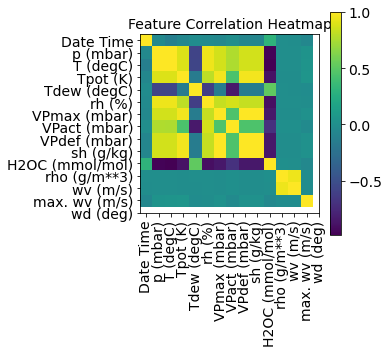

In [10]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()


show_heatmap(df)

Observe that, as expected from a timeseries, we have an implicit dependency of all the features on the time, though no present explicitly on the correlation computation.

However, we see stronger correlation over multiple features such as Temperature and Pression, as expected from the gas law, or among diverse features and the "Water vapor concentration", H2OC feature.  

For the subsequent steps we may follow two different approaches. On the one hand, we may consider the classic study over a time series using the autoregressive models and the analysis techniques learned during the Time Series course (regarding the `sarima`/`arima` fitting and forecasting). On the other hand, we may use a rather machine learning oriented approach, using the package `keras` and building a neural network in order to compute the training and the predictions in order to compare both performances. 

If the time/extensions restriction allow it, alternative approaches such as the resevoir computing network or the kalman filter may also be implemented over the available data in order to fully apply the course learnings. 


### Neural Networks forecasting:

### Data preprocessing:

We may be using the 80% of the dataset for training, and the remaining 20% may represent the validation set. 

In [11]:
split_fraction = 0.8
train_split = int(split_fraction * int(df.shape[0]))
step = 6

In [12]:
print(train_split)
print(train_split/6)

336440
56073.333333333336


We are therefore using about 336.000 time steps as training. Recall that each observation is recorded every 10 mins, that means 6 times per hour, this is about 56.000 hours as time interval.  

We will resample one point per hour since no drastic change is expected within 60 minutes. We do this via the `sampling_rate` argument in `timeseries_dataset_from_array` utility.

We are tracking data from past 720 timestamps (720/6=120 hours). This data will be used to predict the temperature after 72 timestamps (72/6=12 hours).

In [13]:
past = 720
future = 72
learning_rate = 0.001
batch_size = 256
epochs = 10


def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std

Moreover, we can see from the correlation heatmap, few parameters like Relative Humidity and Specific Humidity are redundant. Hence we may select some features, not all.

In [14]:
print(
    "The selected parameters are:",
    ", ".join([titles[i] for i in [0, 1, 5, 7, 8, 10, 11]]),
)
selected_features = [feature_keys[i] for i in [0, 1, 5, 7, 8, 10, 11]]
features = df[selected_features]
features.index = df[date_time_key]
features.head()

features = normalize(features.values, train_split)
features = pd.DataFrame(features)
features.head()

train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

The selected parameters are: Pressure, Temperature, Saturation vapor pressure, Vapor pressure deficit, Specific humidity, Airtight, Wind speed


#### Traning dataset

According to the aforementioned analysis over the dataset, we may consider the following training set on our model:

In [15]:
start = past + future
end = start + train_split

x_train = train_data[[i for i in range(7)]].values
y_train = features.iloc[start:end][[1]]

sequence_length = int(past / step)

This is, from the original dataset, where each column represents a feature with the correpsonding timesteps determined by each element of that column:

In [16]:
train_data

,0,1,2,3,4,5,6
0,0.920682,-2.014960,-1.315987,-0.782129,-1.493220,2.243871,-0.727998
1,0.926670,-2.061164,-1.329360,-0.784270,-1.512196,2.294955,-0.929488
2,0.921879,-2.073012,-1.332035,-0.786410,-1.515992,2.305920,-1.273970
3,0.919484,-2.049317,-1.325348,-0.788551,-1.500811,2.279754,-1.176475
4,0.919484,-2.044578,-1.324011,-0.788551,-1.500811,2.275020,-1.189475
...,...,...,...,...,...,...,...
336435,0.137404,1.085504,1.029669,1.110216,0.597983,-0.976454,-0.468012
336436,0.138602,1.073657,1.012283,1.103794,0.575211,-0.964991,-0.598005
336437,0.139799,1.059440,0.990886,1.078106,0.567621,-0.952033,-0.370517
336438,0.137404,1.035745,0.956116,1.011745,0.579007,-0.933094,-0.058533


Thus, we define the corresponding multivariate time series, as the `x_train` vector, given by the 7 significant features of the initial dataset: 

In [17]:
print(x_train.shape)
print(x_train[:5])

(336440, 7)
[[ 0.92068158 -2.01495953 -1.31598677 -0.78212897 -1.49322     2.24387052
  -0.72799832]
 [ 0.92666994 -2.06116438 -1.32935994 -0.78426963 -1.51219644  2.29495513
  -0.92948803]
 [ 0.92187926 -2.07301178 -1.33203458 -0.78641029 -1.51599172  2.30591964
  -1.27397044]
 [ 0.91948391 -2.04931698 -1.32534799 -0.78855096 -1.50081057  2.27975435
  -1.17647542]
 [ 0.91948391 -2.04457802 -1.32401067 -0.78855096 -1.50081057  2.27501968
  -1.18947476]]


In [18]:
print(y_train.shape)
print(y_train[:5])

(336440, 1)
            1
792 -2.777932
793 -2.732912
794 -2.671305
795 -2.626285
796 -2.536245


In [19]:
#features.iloc[start:end][[3]][:5]

Similarly, the `y_train` is defined as the corresponding dataset by just considering the future time steps in order to compute the forecastings for each feature in terms of the past observations of the whole dataset. We may in fact set one of the features as the target feature to forecast over the model, for example the label at index `1`: Temperature

The function `timeseries_dataset_from_array` from the `keras` package accepts a series of data points collected at regular intervals, as well as time series parameters like sequence/window length, spacing between sequences/windows, and more. It generates batches of sub-timeseries inputs and targets that are sampled from the main timeseries.

In [20]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

2023-06-22 19:45:11.535716: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
dataset_train

<BatchDataset element_spec=(TensorSpec(shape=(None, None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))>

#### Validation dataset

In [22]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end][[i for i in range(7)]].values
y_val = features.iloc[label_start:][[1]]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (256, 120, 7)
Target shape: (256, 1)


#### Training:

In [23]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 7)]          0         
                                                                 
 lstm (LSTM)                 (None, 32)                5120      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 5,153
Trainable params: 5,153
Non-trainable params: 0
_________________________________________________________________


In [24]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/10
1312/1312 [==============================] - ETA: 0s - loss: 0.1964
Epoch 1: val_loss improved from inf to 0.17863, saving model to model_checkpoint.h5
1312/1312 [==============================] - 191s 143ms/step - loss: 0.1964 - val_loss: 0.1786
Epoch 2/10
1312/1312 [==============================] - ETA: 0s - loss: 0.1304
Epoch 2: val_loss improved from 0.17863 to 0.16249, saving model to model_checkpoint.h5
1312/1312 [==============================] - 185s 141ms/step - loss: 0.1304 - val_loss: 0.1625
Epoch 3/10
1312/1312 [==============================] - ETA: 0s - loss: 0.1204
Epoch 3: val_loss improved from 0.16249 to 0.15906, saving model to model_checkpoint.h5
1312/1312 [==============================] - 205s 156ms/step - loss: 0.1204 - val_loss: 0.1591
Epoch 4/10
1312/1312 [==============================] - ETA: 0s - loss: 0.1162
Epoch 4: val_loss improved from 0.15906 to 0.15521, saving model to model_checkpoint.h5
1312/1312 [==============================] - 188s 1

Let us visualize the evolution of the loss along the different epochs during the training: 

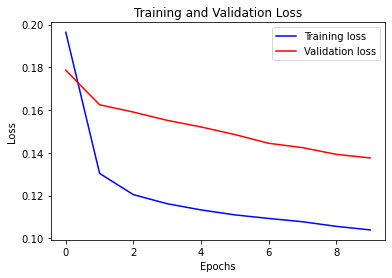

In [25]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

In [26]:
history.history["loss"]

[0.1964198648929596,
 0.13038623332977295,
 0.12043916434049606,
 0.11620216816663742,
 0.1133074089884758,
 0.11098113656044006,
 0.10931769758462906,
 0.10777560621500015,
 0.10562088340520859,
 0.10395190119743347]

In [27]:
history.history["val_loss"]

[0.17862938344478607,
 0.16249175369739532,
 0.15906056761741638,
 0.15520668029785156,
 0.15211984515190125,
 0.1485508531332016,
 0.1444770246744156,
 0.1424398273229599,
 0.13930416107177734,
 0.1376187950372696]

#### Forecasting

The trained network model is now able to forecast different values for multiple validation sets. Let us visualize the effectivity of some of the predictions: 

8/8 [==============================] - 0s 13ms/step


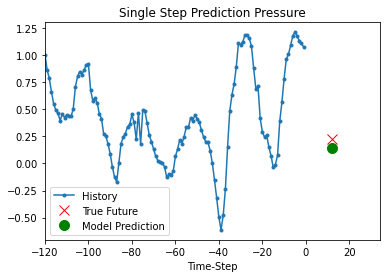

8/8 [==============================] - 0s 13ms/step
Error prediction: 0.0812199792910624
8/8 [==============================] - 0s 14ms/step


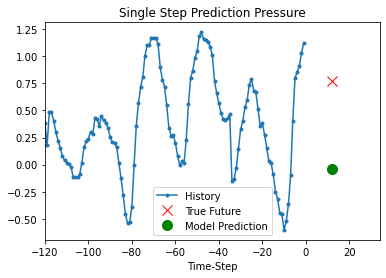

8/8 [==============================] - 0s 14ms/step
Error prediction: 0.8164500213681182
8/8 [==============================] - 0s 14ms/step


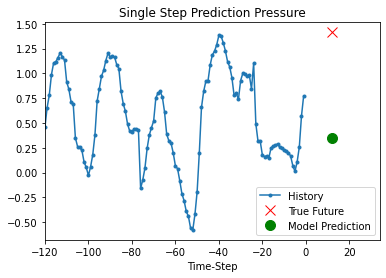

8/8 [==============================] - 0s 12ms/step
Error prediction: 1.0709855432885402
8/8 [==============================] - 0s 11ms/step


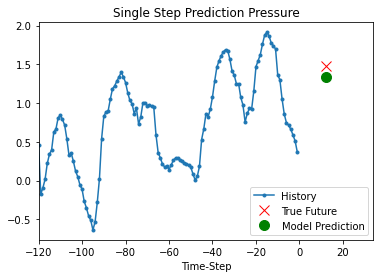

8/8 [==============================] - 0s 11ms/step
Error prediction: 0.14283909300434994
8/8 [==============================] - 0s 11ms/step


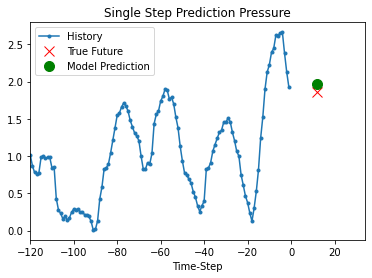

8/8 [==============================] - 0s 11ms/step
Error prediction: 0.10996683143028241


In [29]:
import numpy as np
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


for x, y in dataset_val.take(5):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Prediction Pressure",
    )
    print('Error prediction:', np.linalg.norm(y[0].numpy() - model.predict(x)[0]))

Observe that some of the predictions are quite accurate, while some deviate due to some slope drastic changing.

Similarly, we can visualize different predictions for the other features available, for example, let us visualize the obtained forecasting values for the Temperature feature: 

8/8 [==============================] - 0s 15ms/step


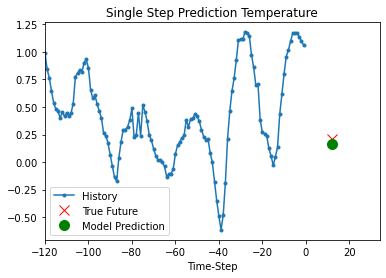

8/8 [==============================] - 0s 15ms/step
Error prediction: 0.047426576638115725
8/8 [==============================] - 0s 13ms/step


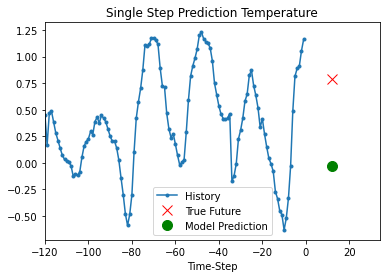

8/8 [==============================] - 0s 12ms/step
Error prediction: 0.8211687363884828
8/8 [==============================] - 0s 13ms/step


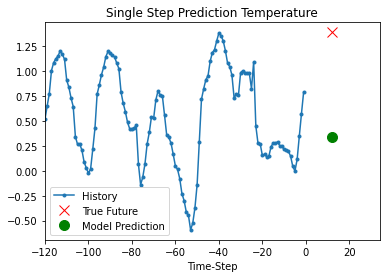

8/8 [==============================] - 0s 12ms/step
Error prediction: 1.0563670531622367
8/8 [==============================] - 0s 15ms/step


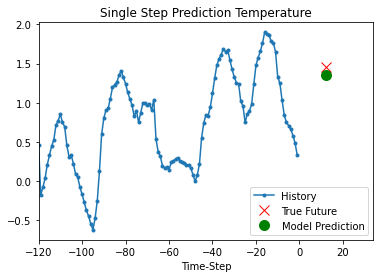

8/8 [==============================] - 0s 11ms/step
Error prediction: 0.10926489773028925
8/8 [==============================] - 0s 13ms/step


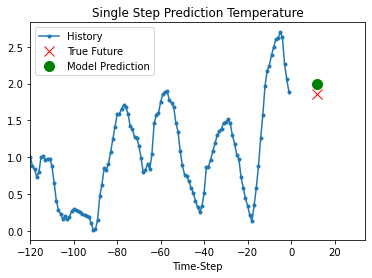

8/8 [==============================] - 0s 12ms/step
Error prediction: 0.1372203722027059


In [30]:
for x, y in dataset_val.take(5):
    show_plot(
        [x[1][:, 1].numpy(), y[1].numpy(), model.predict(x)[1]],
        12,
        "Single Step Prediction Temperature",
    )
    print('Error prediction:', np.linalg.norm(y[1].numpy() - model.predict(x)[1]))

In [34]:
((0.1372203722027059 + 0.10926489773028925 + 0.8211687363884828 +0.047426576638115725 + 1.0563670531622367)/5)**2

0.18860739345676342

In [ ]:
print('Error prediction:', np.linalg.norm(y[0].numpy() - model.predict(x)[0]))

In [26]:
print(history)
print(history.params)

{'verbose': 1, 'epochs': 10, 'steps': 1312}


In [42]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])
          0         1         2         3         4         5         6
0  0.920682 -2.014960 -1.315987 -0.782129 -1.493220  2.243871 -0.727998
1  0.926670 -2.061164 -1.329360 -0.784270 -1.512196  2.294955 -0.929488
2  0.921879 -2.073012 -1.332035 -0.786410 -1.515992  2.305920 -1.273970
3  0.919484 -2.049317 -1.325348 -0.788551 -1.500811  2.279754 -1.176475
4  0.919484 -2.044578 -1.324011 -0.788551 -1.500811  2.275020 -1.189475


### Autoregressive Analysis of the multivariate time series: 

We may consider the same structure over the training and validation set, i.e. we may consider the training set in order to determine the possible autoregressive model fitting the dataset and then use the fitted models in order to compute the forecastings over the time steps corresponding to the validating set, in order to verify the efficientcy of the model obtained.  

In [11]:
train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

print(train_data.shape)
print(val_data.shape)

(336440, 7)
(84111, 7)


As defined above and following the same arguments aforementioned, we may consider the significant features from the dataset instead of all of the variables, due to the significant correlation among some of them. 

In order to fully understand the knowledgments acquired on this Time Series course, two different approaches may be followed: 
- On the one hand, I may consider an unidimensional time series, in order to study for example the forecasting of the temperature. 
- On the other hand, I may consider a multivariate study over the whole dataset in order to analyse the performance over the forecasting of the temperature

All the performances may be contrasted with the obtained results using the neural network model. 


#### Univariate time series 

Let us consider the temperature feature in order to compute the following univariate time series analysis: 

In [12]:
x_temp = train_data[1]
print(x_temp.shape)
print(x_temp[:5])
train_data.head()

(336440,)
0   -2.014960
1   -2.061164
2   -2.073012
3   -2.049317
4   -2.044578
Name: 1, dtype: float64


,0,1,2,3,4,5,6
0,0.920682,-2.014960,-1.315987,-0.782129,-1.493220,2.243871,-0.727998
1,0.926670,-2.061164,-1.329360,-0.784270,-1.512196,2.294955,-0.929488
2,0.921879,-2.073012,-1.332035,-0.786410,-1.515992,2.305920,-1.273970
3,0.919484,-2.049317,-1.325348,-0.788551,-1.500811,2.279754,-1.176475
4,0.919484,-2.044578,-1.324011,-0.788551,-1.500811,2.275020,-1.189475


In order to compute the corresponding time series analysis I may use the following libraries of python. Regarding the initial visualization of the dataset, we have some intuition that the time series may be seasonal, therefore, SARIMA models may also be considered when studying the possible time series models that could fit the dataset:

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

Let us consider the corresponding data as a time series object in python: 

In [14]:
temp_ts = pd.Series(x_temp)

Let us again visualize the given data in order to reafirm the hypothesis considered above: 

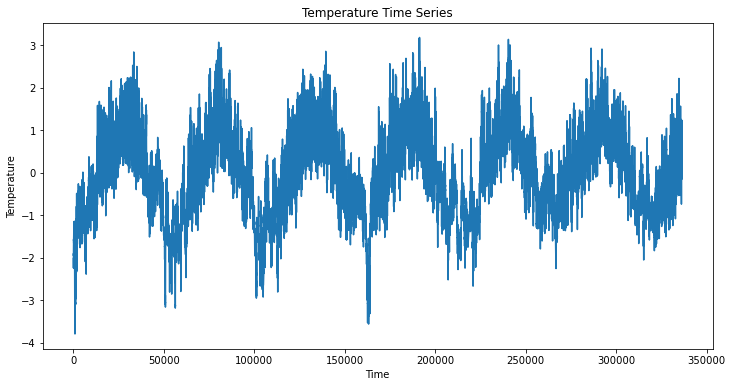

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(temp_ts)
plt.title('Temperature Time Series')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()


Recall that our recordings are computed every 10 mins, that means 6 times per hour. Therefore, for a year we may have the following number of observations:
#### Time series treating using the dates

Consider the first approach study by decomposing the original time series. Let us consider just the last five years of dataset 

Recall that our recordings are computed every 10 mins, that means 6 times per hour. Therefore, for a year we may have the following number of observations:


In [16]:
print(365*24*6)
T = 52560

52560


In [17]:
df = pd.read_csv(csv_path)
df2 = df[-5*T:]
df2.head
#6*24

<bound method NDFrame.head of                   Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  \
157751  31.12.2011 12:20:00    985.75      2.32    276.62        -1.05   
157752  31.12.2011 12:30:00    985.56      2.31    276.62        -1.09   
157753  31.12.2011 12:40:00    985.52      2.39    276.70        -0.98   
157754  31.12.2011 12:50:00    985.43      2.47    276.78        -0.98   
157755  31.12.2011 13:00:00    985.38      2.58    276.90        -1.03   
...                     ...       ...       ...       ...          ...   
420546  31.12.2016 23:20:00   1000.07     -4.05    269.10        -8.13   
420547  31.12.2016 23:30:00    999.93     -3.35    269.81        -8.06   
420548  31.12.2016 23:40:00    999.82     -3.16    270.01        -8.21   
420549  31.12.2016 23:50:00    999.81     -4.23    268.94        -8.53   
420550  01.01.2017 00:00:00    999.82     -4.82    268.36        -8.42   

        rh (%)  VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
157751   7

In [18]:
df2['Date Time']

157751    31.12.2011 12:20:00
157752    31.12.2011 12:30:00
157753    31.12.2011 12:40:00
157754    31.12.2011 12:50:00
157755    31.12.2011 13:00:00
                 ...         
420546    31.12.2016 23:20:00
420547    31.12.2016 23:30:00
420548    31.12.2016 23:40:00
420549    31.12.2016 23:50:00
420550    01.01.2017 00:00:00
Name: Date Time, Length: 262800, dtype: object

In [19]:
df2['T (degC)']

157751    2.32
157752    2.31
157753    2.39
157754    2.47
157755    2.58
          ... 
420546   -4.05
420547   -3.35
420548   -3.16
420549   -4.23
420550   -4.82
Name: T (degC), Length: 262800, dtype: float64

In [20]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert the time series to a pandas DataFrame with a frequency of 10 minutes
df_ts = pd.DataFrame({
    'Time': df2['Date Time'],
    'Temperature': df2['T (degC)']})
# Reset the index 
df_ts.set_index("Time", inplace=True)

df_ts

,Temperature
Time,
31.12.2011 12:20:00,2.32
31.12.2011 12:30:00,2.31
31.12.2011 12:40:00,2.39
31.12.2011 12:50:00,2.47
31.12.2011 13:00:00,2.58
...,...
31.12.2016 23:20:00,-4.05
31.12.2016 23:30:00,-3.35
31.12.2016 23:40:00,-3.16


In [26]:
df_ts.describe()

,Temperature
count,262800.000000
mean,9.991564
std,8.193012
min,-21.040000
25%,3.920000
50%,9.790000
75%,15.810000
max,37.280000


<AxesSubplot:xlabel='Time'>

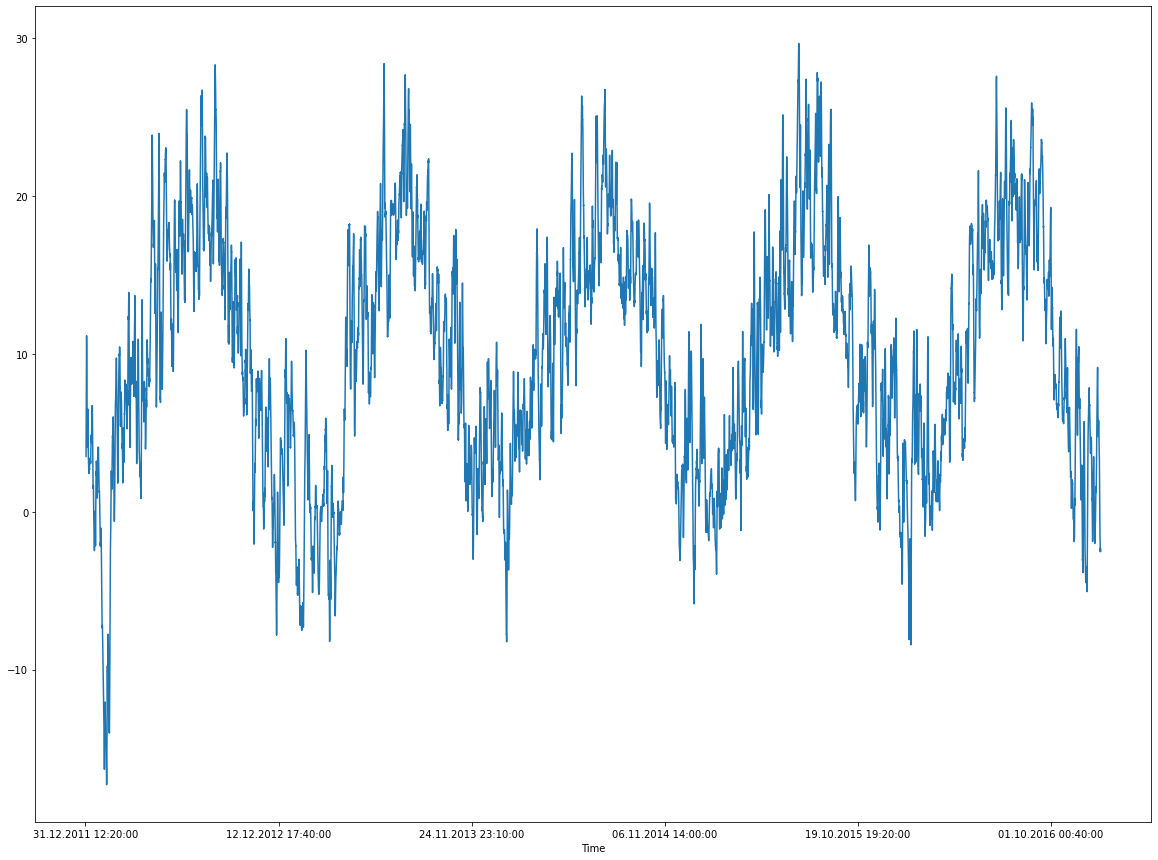

In [27]:
# Apply the Moving Average function by a subset of size 30 days.
temp_df_mean = df_ts.Temperature.rolling(window=144).mean()
temp_df_mean.plot(figsize=(20,15))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

"""
# Additive Decomposition
result_add = seasonal_decompose(df_ts.Temperature, model='additive', extrapolate_trend='freq', period=365*144)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decomposition', fontsize=22)
plt.show()
"""

In [21]:
# Additive Decomposition
#result_add = seasonal_decompose(df_ts['Temperature'], model='additive')

# Plot
#result_add.plot().suptitle('Additive Decomposition', fontsize=22)
#plt.show()

By plotting the ACF and PACF, we can gain insights into the potential order of the ARIMA model (the order parameter) based on the significant lags. Recall that the ACF plot shows the correlation between the current observation and its past values at various lags, while the PACF plot displays the correlation between the current observation and its past values, excluding the influence of intermediate observations.

Observing significant lags in the ACF and PACF plots can help determine the appropriate values for the order parameter of the ARIMA model, indicating the number of autoregressive (AR) and moving average (MA) terms to include in the model.

However, with this time series, it may be advisable to try to remove seasonality before the more extended study over the ACF and PACF lags are considered. 



Consider therefore the corresponding differentiated model in order to find the best fitted model over a time series without seasonality. This is, being $X_t$ the initial time series, we may consider the corresponding differentiation using the backward operator as follows:

$$
Y_t = \nabla_T X_t = X_t - B^T X_t = X_t - X_{t-T}
$$

for $T= 52560$. 

To differentiate a time series at a lag T = 52560 we can use the `numpy` library to calculate the difference between the current observation X_t and the observation T time steps ago, X_{t-T} with the following code lines:

In [22]:


x_temp_diff = x_temp - np.roll(x_temp, T)

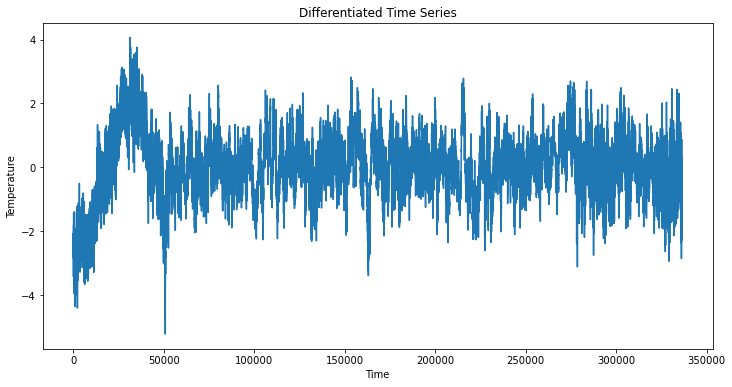

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(x_temp_diff)
plt.title('Differentiated Time Series')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()

Observe that the differentiation has not been applied for the T initial time steps, however since the dimensionality of the time series interval is significant we can neglict those observations:

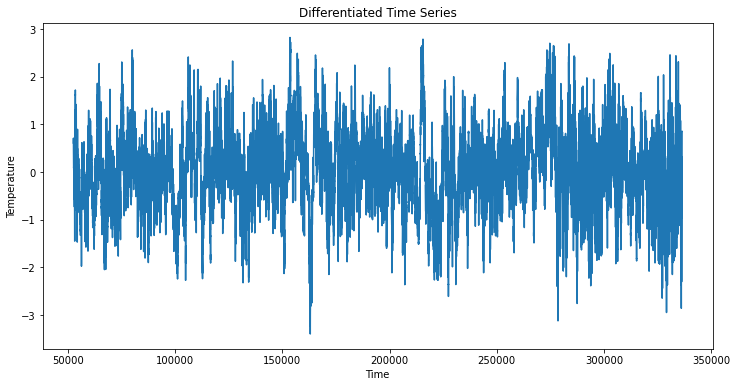

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(x_temp_diff[T:])
plt.title('Differentiated Time Series')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()

Now we can compute the corresponding analysis over the differentiated time series. 

First of all we may consider a general analysis over the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) significant lags. I onrder to visualize those plots in Python, we may use the `plot_acf()` and `plot_pacf()` functions from the `statsmodels.graphics.tsaplots` module as follows: 

<Figure size 864x432 with 0 Axes>

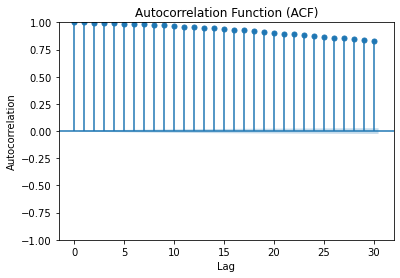

In [66]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(x_temp_diff[T:], lags=30)  # Specify the number of lags to show
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

<Figure size 864x432 with 0 Axes>

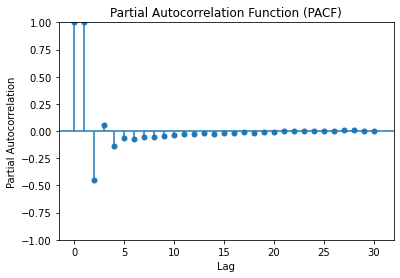

In [68]:
# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(x_temp_diff[T:], lags=30, method = 'ywm')  # Specify the number of lags to show
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In order to fit a right ARIMa model, observe that unfortunately, Python's `statsmodels` library does not have an equivalent `auto.arima()` function like the one available in R's `forecast` package. However, I may try to implement an automate algorithm of determining the optimal ARIMA model order using Python by iterating over different combinations of orders and selecting the model with the best fit based on a chosen criterion (e.g., AIC, BIC). The corresponding implementation is conducted as follows: 

In [69]:
# Define the range of orders to iterate over
p_values = range(0, 3)  # AR order
d_values = range(0, 2)  # I order
q_values = range(0, 3)  # MA order

# Initialize variables to store best model and its corresponding metric
best_model = None
best_metric = float('inf')  # Initialize with a high value (e.g., AIC, BIC)

# Iterate over different combinations of orders
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                # Fit the ARIMA model
                print('ARIMA model parameters, (p,d,q)=', p,d,q)
                model = ARIMA(x_temp_diff[T:], order=(p, d, q))
                result = model.fit()

                # Calculate the chosen metric (e.g., AIC, BIC)
                metric = result.aic  
                
                # We can for instance replace with result.bic for BIC

                # Update the best model and metric if necessary
                if metric < best_metric:
                    best_model = result
                    best_metric = metric

            except:
                continue

# Use the best model for further analysis


/Users/flaviaferrusmarimon/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/flaviaferrusmarimon/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/flaviaferrusmarimon/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/flaviaferrusmarimon/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
 

On the algorithm above the AIC criterion is used in order to compute the best fitted model, provided by the object `best_model` that we can use to compute forecasts. 

In [72]:
print(best_model.model.order)
print(best_metric)

(2, 1, 2)
-1118320.1752412345


The obtained model is an ARIMA(2,1,2), this is $Y_t \sim ARIMA(2,1,2)$, i.e. ...

In [74]:
print(best_model.params)

ar.L1     1.177050
ar.L2    -0.195702
ma.L1    -0.622320
ma.L2    -0.301782
sigma2    0.001018
dtype: float64


In [75]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      1   No. Observations:               283880
Model:                 ARIMA(2, 1, 2)   Log Likelihood              559165.088
Date:                Sat, 17 Jun 2023   AIC                       -1118320.175
Time:                        17:41:47   BIC                       -1118267.394
Sample:                             0   HQIC                      -1118304.873
                             - 283880                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1771      0.003    405.970      0.000       1.171       1.183
ar.L2         -0.1957      0.002    -78.301      0.000      -0.201      -0.191
ma.L1         -0.6223      0.003   -219.968      0.000      -0.628      -0.617
ma.L2         -0.3018      0.002   -149.617      0.000      -0.306      -0.298
sigma2         0.0010   1.09e-06    930.109      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                1716.83   Jarque-Bera (JB):            768040.87
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Now, we can compute the corresponding predictions, and compute the MSE as a metrics criterion in order to validate the difference between the forecasted models over the validation set, after computing the corresponding differentiation: 

In [76]:
xx_temp = val_data[1]
print(xx_temp.shape)

(84111,)


In [77]:
forecast_length = xx_temp.shape[0] - T

In [79]:
# ARIMA model
forecast = best_model.forecast(steps=forecast_length)

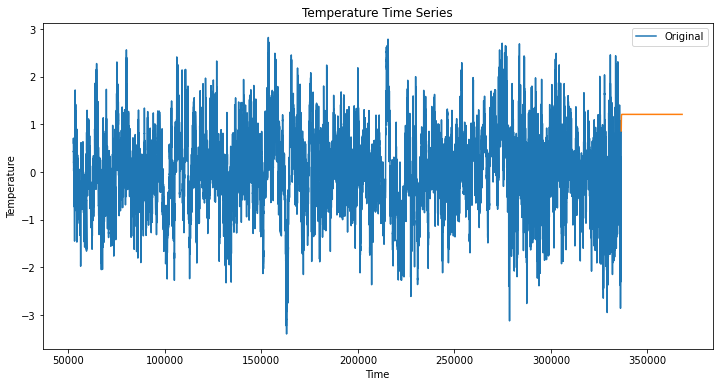

In [80]:
import matplotlib.pyplot as plt

# Plot the original time series
plt.figure(figsize=(12, 6))
plt.plot(x_temp_diff[T:], label='Original')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature Time Series')
plt.legend()

# Plot the forecasted values
plt.plot(forecast.index, forecast.values, label='Forecast')

# Show the plot
plt.show()

In [4]:
forecast.values

NameError: name 'forecast' is not defined

Plot single step forecasting in order to actually verify the validity of the predictions:

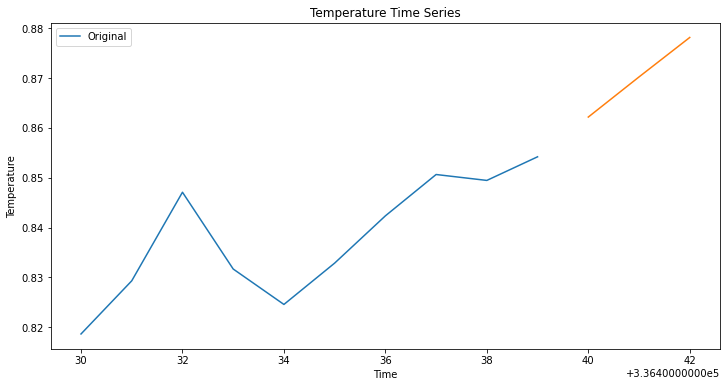

In [86]:
import matplotlib.pyplot as plt

# Plot the original time series
plt.figure(figsize=(12, 6))
plt.plot(x_temp_diff[-10:], label='Original')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature Time Series')
plt.legend()

# Plot the forecasted values
plt.plot(forecast.index[:3], forecast.values[:3], label='Forecast')

# Show the plot
plt.show()

## Bibliography 

- https://keras.io/examples/timeseries/timeseries_weather_forecasting/
- https://www.bgc-jena.mpg.de/wetter/
- https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/
- Time Series course theory notes
- Time Series course practical statements and explanations
- Time Series: Homework 2. Multivariate Time Series and Reservoir Computing, by Flàvia Ferrús Marimón
- Brockwell



Other alternative models not used on this project but interesting for further studies: 
- https://keras.io/examples/timeseries/eeg_signal_classification/
- https://github.com/keras-team/keras-io/blob/master/examples/timeseries/timeseries_weather_forecasting.py